In [24]:
import torch

In [25]:
torch.zeros([7,3])

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [26]:
torch.ones([7,3])

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [27]:
tmp=torch.Tensor([1,2,3])
tmp.unsqueeze(1)

tensor([[1.],
        [2.],
        [3.]])

In [28]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(25.0,7.0)

In [29]:
x_train=torch.rand(1000)
x_train=x_train*50.0-25.0
x_train

tensor([  7.9533,  -8.2829,  -1.4668, -16.6734,  17.4457,  19.8607, -21.2249,
          7.2261, -17.1063, -11.3701,  23.6643,   1.1585,  10.6732,  -0.9095,
        -15.1399,  16.8134,  21.4727,  -6.0519, -12.3087, -20.0305, -10.4214,
        -12.4666,   0.0568,   0.7132, -20.7096, -11.5741,   7.1817,  18.4359,
          4.0635,  -2.1296, -11.4965,  18.7377, -19.5982, -21.0617,  12.3058,
         -0.2453,  -3.1390,  12.9223,   5.7333,  14.4603,  -7.1022,  23.9501,
         18.4815, -14.1320,  17.4919, -17.4299,   5.9472,  13.7040,  21.0449,
         -4.0304,  -1.3927,  16.6154,  -9.7281,   0.1149,  -7.4499,   6.0988,
         12.2992,   9.5666, -19.9591,  -5.8008, -17.9750,  24.4184, -19.0755,
        -22.7848, -24.3175,  24.4595,  -6.3433,  -1.2172, -24.7260,   6.0813,
          2.5379,   1.7121,  -6.8857,   8.7202, -23.2268, -21.7238,  -4.7324,
          4.5872,   3.6367,  -7.3351, -13.6663, -17.0367,   4.8455,  -2.0076,
         -3.9309, -20.9150,  -4.1686, -11.9928, -23.9242,  18.52

Text(0.5, 1.0, '$ y=cos^2(x) $')

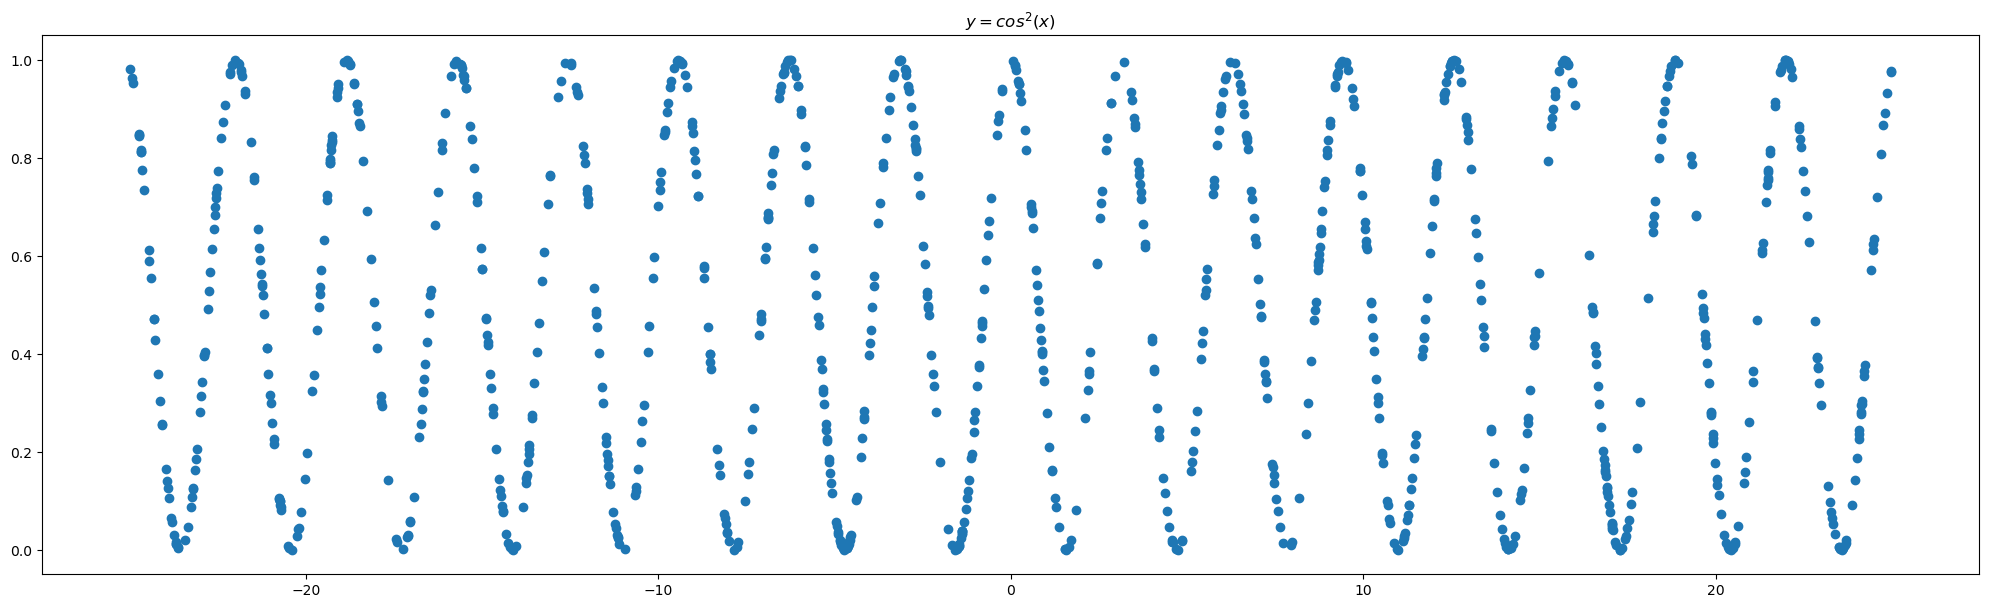

In [38]:
y_sub_train=torch.cos(x_train)**2
plt.plot(x_train.numpy(), y_sub_train.numpy(), 'o')
plt.title('$ y=cos^2(x) $')

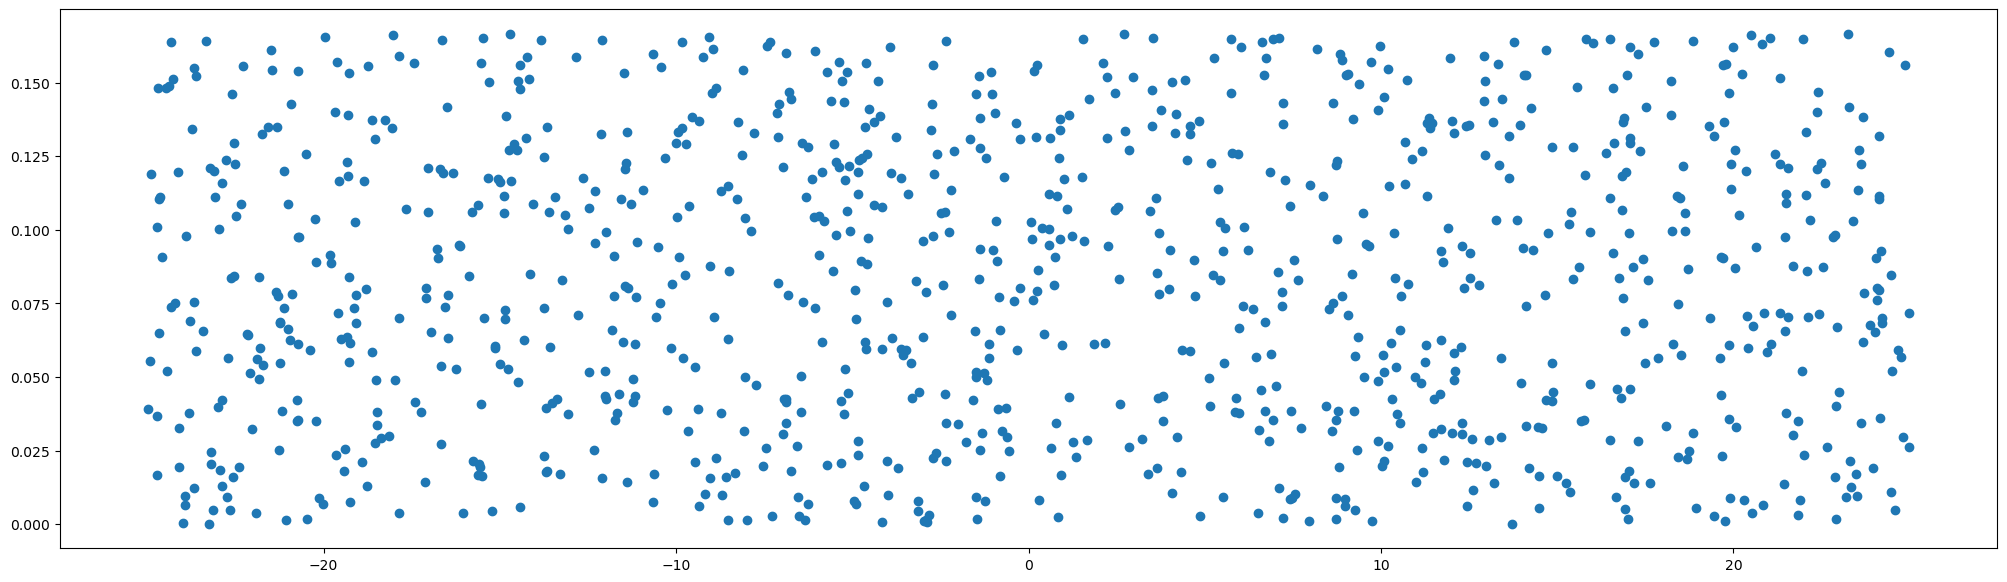

In [52]:
noisy=torch.rand(y_sub_train.shape) /6.
plt.plot(x_train.numpy(), noisy.numpy(), 'o')

Text(0.5, 1.0, 'noisy $ y=cos^2(x) $')

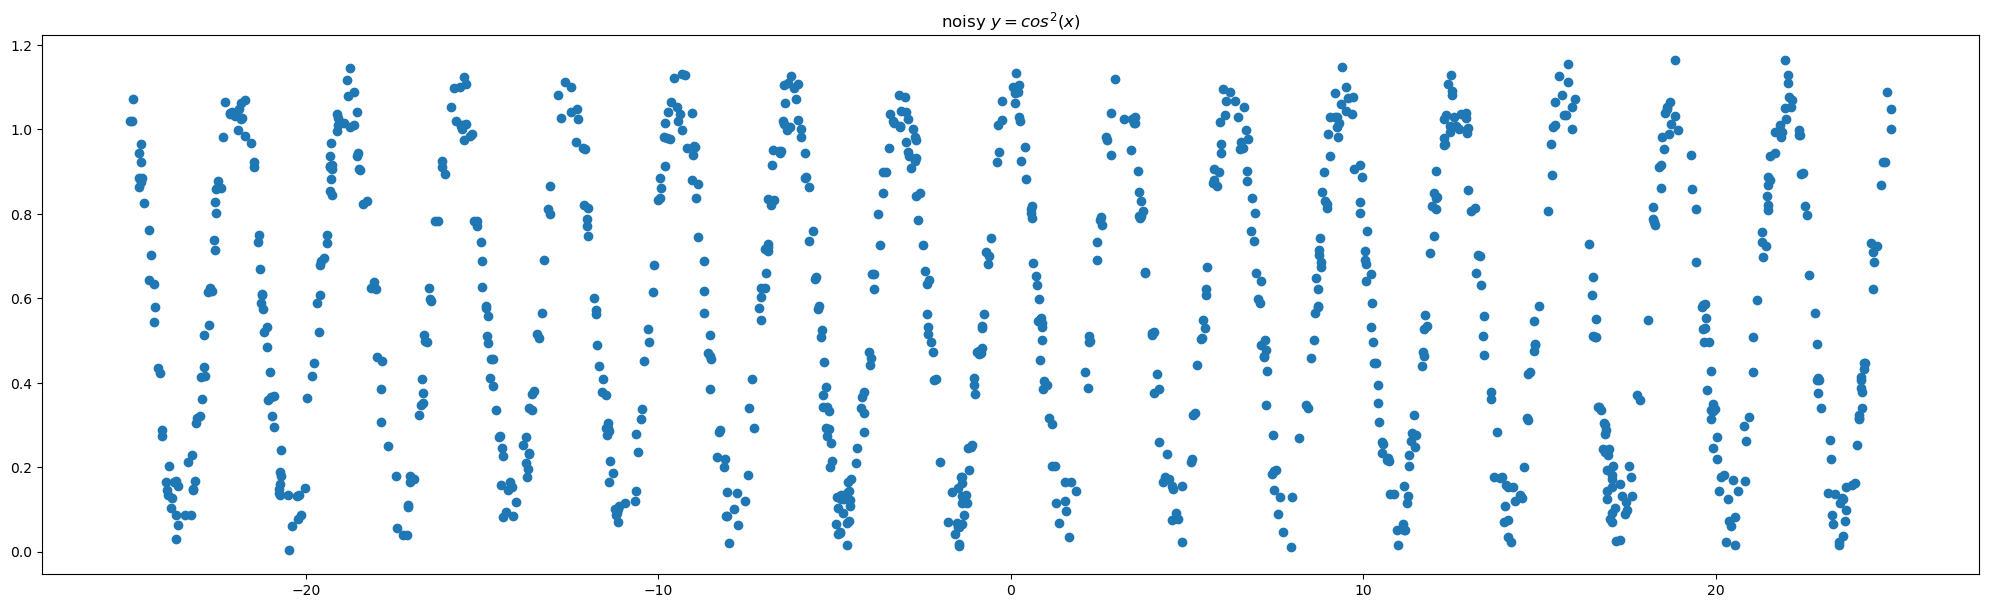

In [53]:
y_train=y_sub_train+noisy
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy $ y=cos^2(x) $')

In [57]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

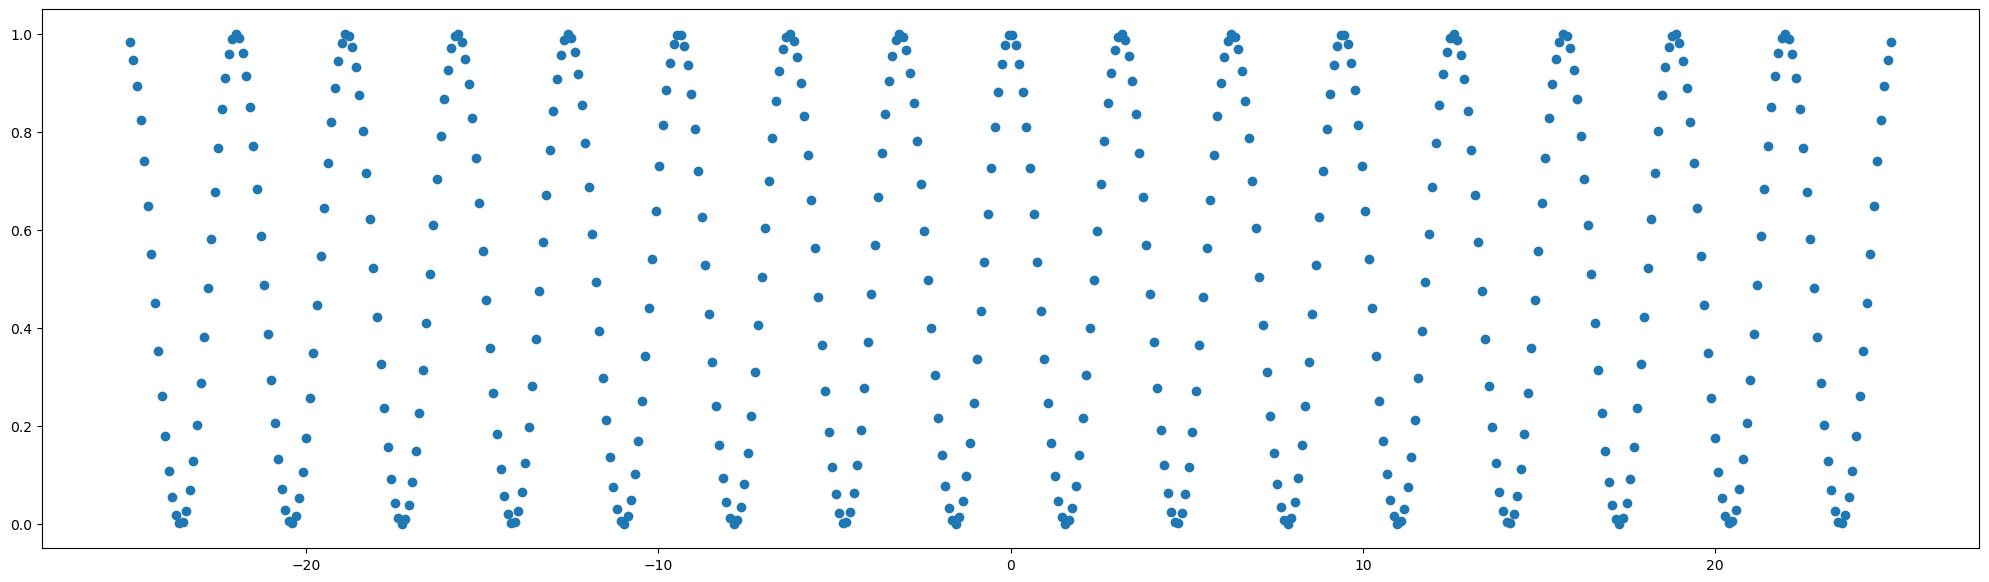

In [60]:
x_val=torch.linspace(-25,25,500)
y_val=torch.cos(x_val.data)**2
plt.plot(x_val.numpy(), y_val.numpy(), 'o')

In [81]:
x_val.unsqueeze_(1).numpy()

y_val.unsqueeze_(1).numpy()


tensor([[[[9.8248e-01]]],


        [[[9.4671e-01]]],


        [[[8.9306e-01]]],


        [[[8.2368e-01]]],


        [[[7.4134e-01]]],


        [[[6.4934e-01]]],


        [[[5.5136e-01]]],


        [[[4.5133e-01]]],


        [[[3.5325e-01]]],


        [[[2.6104e-01]]],


        [[[1.7839e-01]]],


        [[[1.0862e-01]]],


        [[[5.4511e-02]]],


        [[[1.8235e-02]]],


        [[[1.2420e-03]]],


        [[[4.2127e-03]]],


        [[[2.7028e-02]]],


        [[[6.8775e-02]]],


        [[[1.2778e-01]]],


        [[[2.0169e-01]]],


        [[[2.8753e-01]]],


        [[[3.8188e-01]]],


        [[[4.8096e-01]]],


        [[[5.8080e-01]]],


        [[[6.7741e-01]]],


        [[[7.6691e-01]]],


        [[[8.4573e-01]]],


        [[[9.1071e-01]]],


        [[[9.5926e-01]]],


        [[[9.8942e-01]]],


        [[[9.9999e-01]]],


        [[[9.9055e-01]]],


        [[[9.6147e-01]]],


        [[[9.1393e-01]]],


        [[[8.4981e-01]]],


        [[[7.7170e-0

In [68]:
class OurNet(torch.nn.Module):
    def __init__(self, n_hid_n):
        super(OurNet, self).__init__()
        self.fc1 = torch.nn.Linear(1,n_hid_n)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hid_n, n_hid_n)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hid_n, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x
our_net = OurNet (11)
        

In [79]:
def pred (net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', c = 'g',label ='should')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label = 'predict')
    plt.legend(loc= ' upper left')

ValueError: x and y can be no greater than 2D, but have shapes (500, 1, 1, 1) and (500, 1, 1)

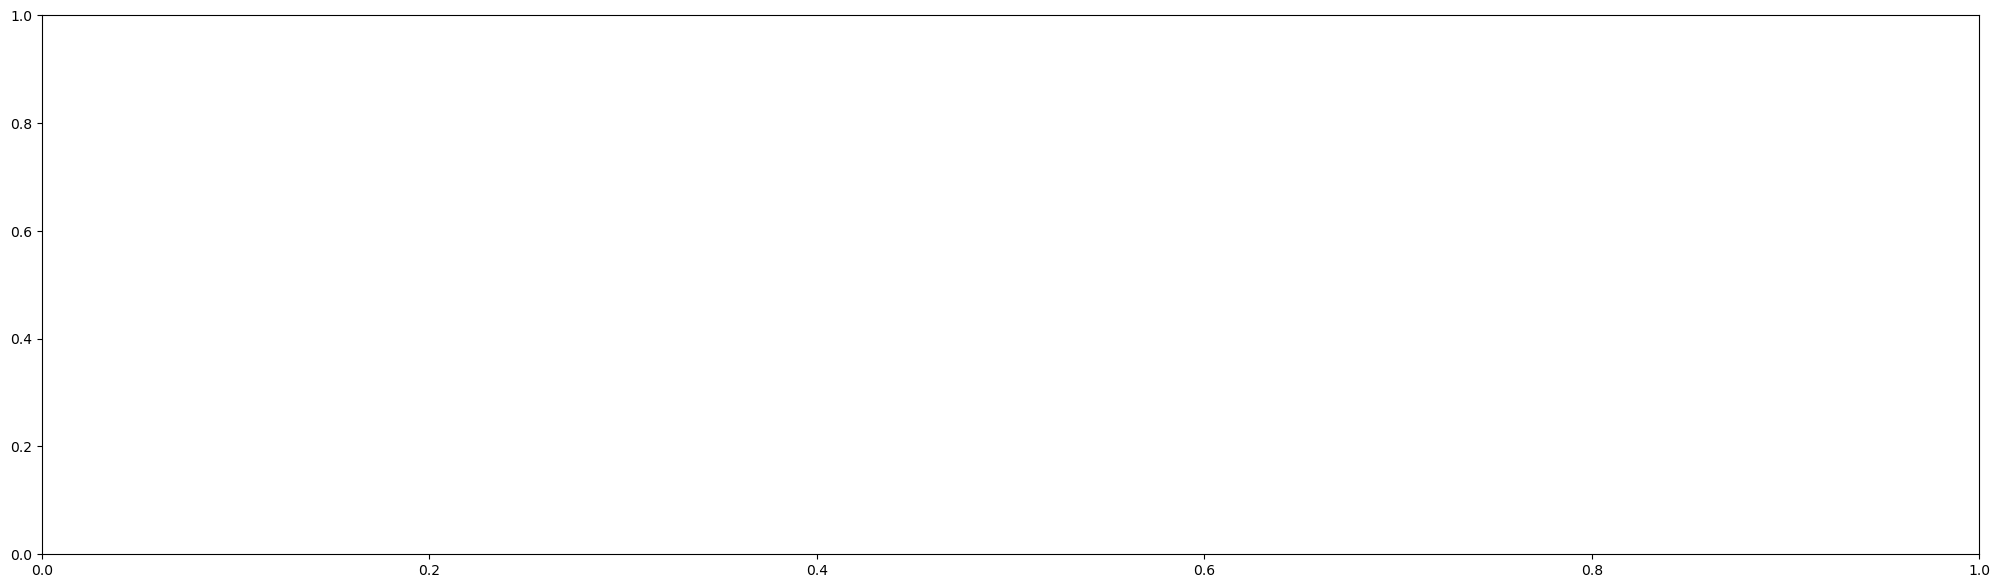

In [80]:
pred(our_net, x_val, y_val)